In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
olympics = pd.read_csv('athlete_events.csv')

In [3]:
olympics = olympics.loc[olympics.Year >= 1994]

# Clean the Team column
# Some of the entries in the column contain the country name followed by a dash and a number, such as China-2.
pd.options.mode.chained_assignment = None
new_Team = [team[:-2] if team[-2] == '-' else team for team in olympics.Team]
olympics.Team = new_Team

top_countries = olympics.groupby('Team').Team.count().sort_values(ascending = False)[0:40,]
olympics = olympics.loc[olympics.Team.isin(top_countries.index)]

olympics_men = olympics.loc[olympics.Sex == 'M']
olympics_women = olympics.loc[olympics.Sex == 'F']

In [4]:
# Determine the most popular event within each sport category for men and women
df_men = olympics_men.groupby(['Sport','Event']).Sport.count()
sports_men = df_men.index.get_level_values(0)
events_men = df_men.loc[df_men.groupby(sports_men).idxmax()].index.get_level_values(level=1).tolist()

df_women = olympics_women.groupby(['Sport','Event']).Sport.count()
sports_women = df_women.index.get_level_values(0)
events_women = df_women.loc[df_women.groupby(sports_women).idxmax()].index.get_level_values(level=1).tolist()

In [5]:
olympics_men = olympics_men.loc[olympics_men.Event.isin(events_men)]
olympics_women = olympics_women.loc[olympics_women.Event.isin(events_women)]

In [6]:
medals_men = olympics_men.loc[pd.notnull(olympics_men.Medal)].groupby(['Team','Event']).Team.count().unstack(level=0).fillna(0)
medals_women = olympics_women.loc[pd.notnull(olympics_women.Medal)].groupby(['Team','Event']).Team.count().unstack(level=0).fillna(0)

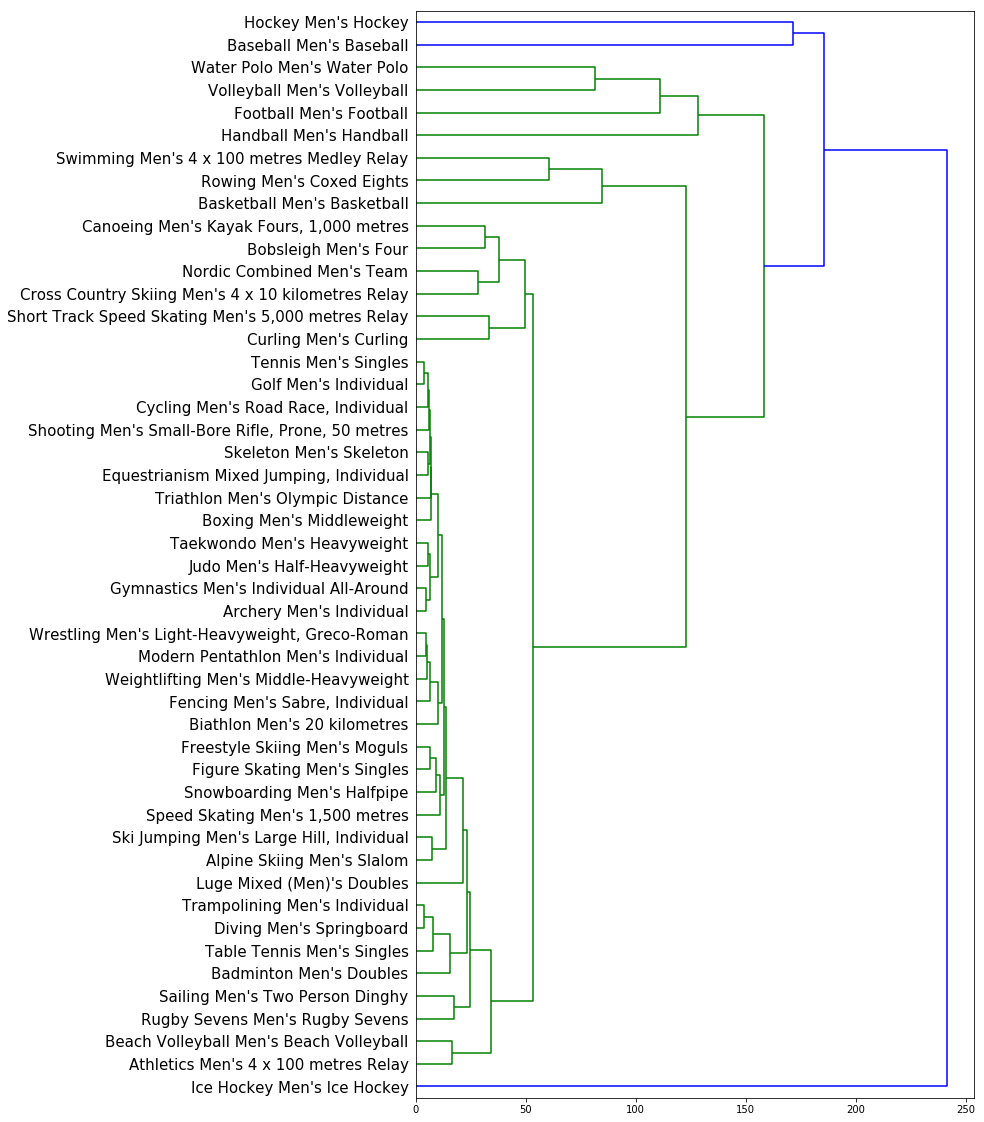

In [7]:
mergings_men = linkage(medals_men, method = 'ward')
plt.figure(figsize=(10,20))
dendrogram(mergings_men, labels = medals_men.index, leaf_rotation = 0, leaf_font_size=15, orientation='right')
plt.show()

# This dendrogram shows how closely certain men's events from different sports are related,
# based on how countries perform in those events. For example:
# Judo is close to taekwondo
# Table tennis is close to badminton
# Freestyle skiing is close to figure skating and snowboarding, etc.

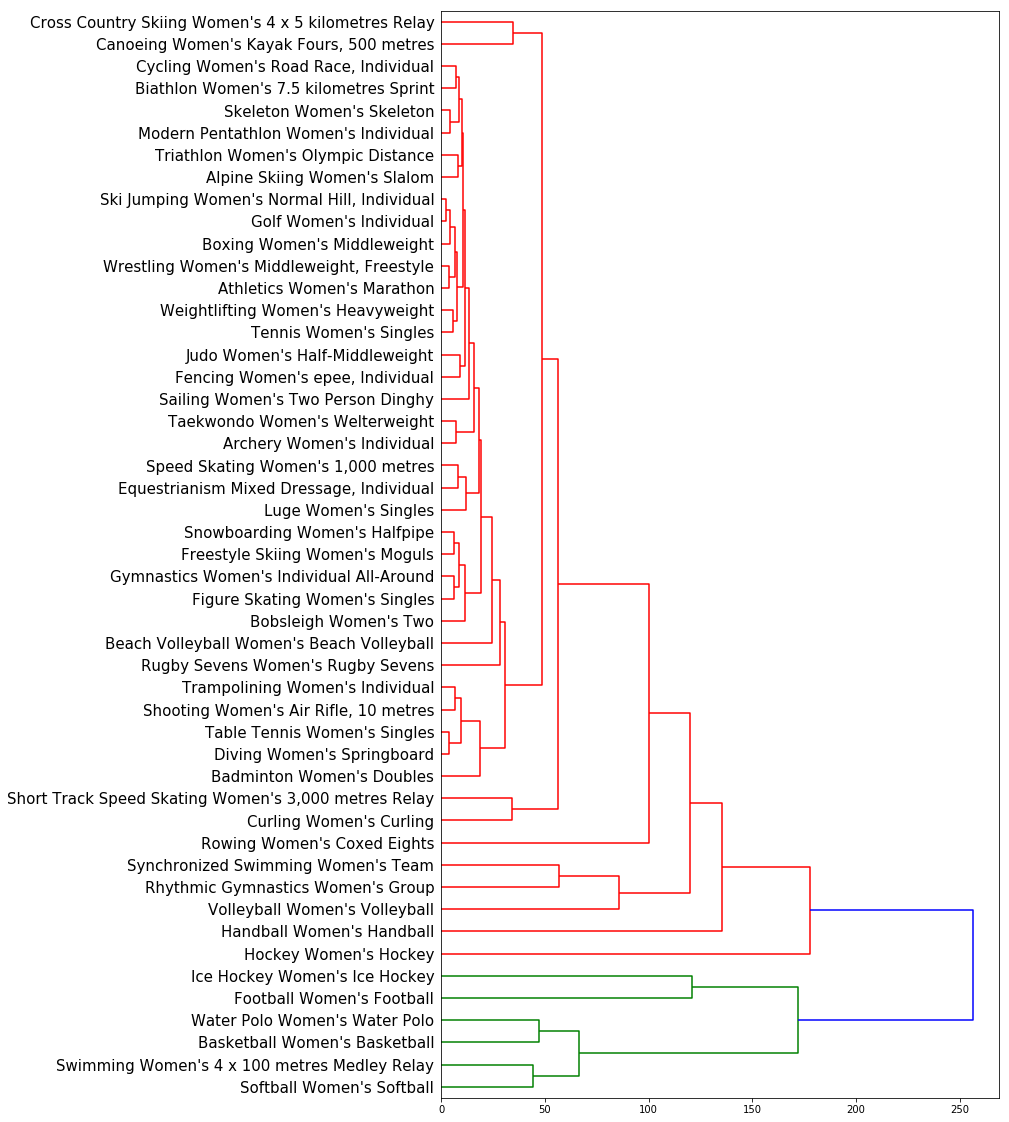

In [8]:
mergings_women = linkage(medals_women, method = 'ward')
plt.figure(figsize=(10,20))
dendrogram(mergings_women, labels = medals_women.index, leaf_rotation = 0, leaf_font_size=15, orientation='right')
plt.show()